           narati       ratio       angel     class_0     class_1     class_2
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000
mean    32.960000    2.899924   56.305000    0.330000    0.350000    0.320000
std     15.308227    0.931572   23.125906    0.472582    0.479372    0.468826
min     12.000000    1.574468   17.000000    0.000000    0.000000    0.000000
25%     22.000000    1.975564   30.000000    0.000000    0.000000    0.000000
50%     27.000000    2.711325   65.000000    0.000000    0.000000    0.000000
75%     49.000000    3.932143   73.000000    1.000000    1.000000    1.000000
max     68.000000    4.447368  109.000000    1.000000    1.000000    1.000000
    narati     ratio  angel  class_0  class_1  class_2
83      57  1.837209   67.0        0        0        1
53      32  3.702703   35.0        0        1        0
70      52  2.052632   59.0        0        0        1
45      28  3.627907   28.0        0        1        0
44      28  3.714286   

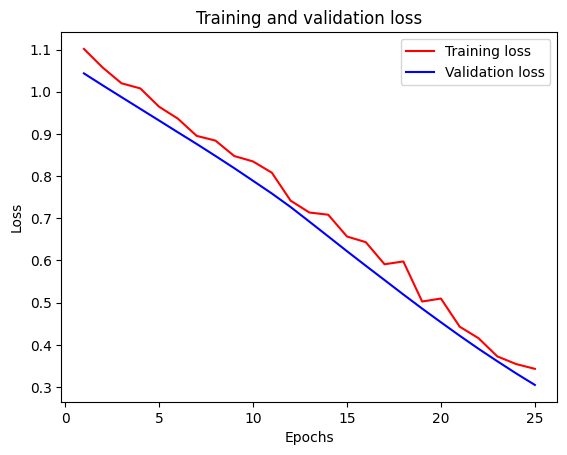

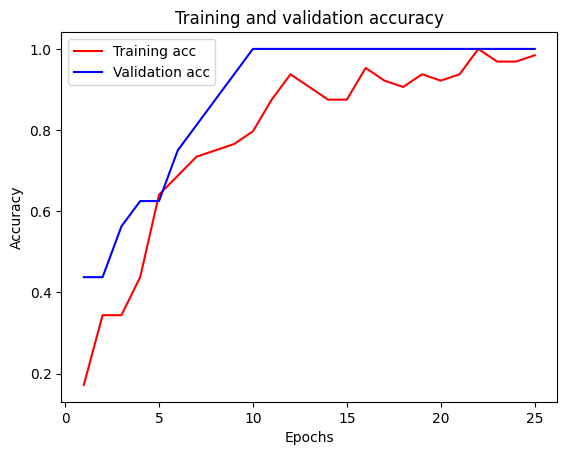

1/1 [==============================] - 0s 35ms/step - loss: 0.3499 - accuracy: 1.0000
Accuracy: 1.0
1/1 [==============================] - 0s 66ms/step
Predicted class: 2
Predicted class: Cryptostegia grandiflora


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from PIL import Image

# Load the dataset
df = pd.read_csv('dataset.csv')
#print(df.describe())

# Shuffle the Dataset
shuffled_df = df.sample(frac=1, random_state=42)
#print(shuffled_df)

# Create a 'class' column from one-hot encoded columns.
df['class'] = np.argmax(df[['class_0', 'class_1', 'class_2']].values, axis=1)

# Drop the individual class columns to create the feature set
X = df.drop(['class_0', 'class_1', 'class_2', 'class'], axis=1).values

# Extract the target variable
y = df['class'].values
print(y)

# Convert target variable to categorical
y = to_categorical(y)
print(y.shape)
print(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model with additional layers
model = Sequential([
    Dense(52, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(44, activation='relu'),
    Dense(36, activation='relu'),  # Added layer
    Dropout(0.3),                  # Added dropout layer
    Dense(28, activation='relu'),  # Added layer
    Dense(y.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)
history = model.fit(X_train_scaled, y_train, epochs=25, batch_size=34, validation_split=0.2, callbacks=[early_stopping, model_checkpoint])

# Plot training and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Accuracy: {accuracy}')

# Function to get user inputs
def get_user_inputs():
    user_input = []
    feature_names = df.columns[:-4]  # Exclude the last 4 columns (class_0, class_1, class_2, class)
    for feature in feature_names:
        value = float(input(f"Enter value for {feature}: "))  # Ensure the input is of correct type
        user_input.append(value)
    return user_input

# Function to predict the class
def predict_class(user_input):
    # Preprocess the user input
    user_input_scaled = scaler.transform(np.array(user_input).reshape(1, -1))
    
    # Make prediction
    predicted_probabilities = model.predict(user_input_scaled)
    predicted_class = np.argmax(predicted_probabilities)
    
    return predicted_class

# Get user inputs
user_input = get_user_inputs()
predicted_class = predict_class(user_input)
print("Predicted class:", predicted_class)

# Display the predicted class and corresponding image
if predicted_class == 1:
    print("Predicted class: Allamanda Cathartica")
    image = Image.open('Golden Trumpet.jpeg')
    image.show()

elif predicted_class == 0:
    print("Predicted class: Ixora coccinea")
    image = Image.open('Ixora.jpeg')
    image.show()

elif predicted_class == 2:
    print("Predicted class: Cryptostegia grandiflora")
    image = Image.open('Cryptostegia grandiflora.jpeg')
    image.show()
else:
    print("Not defined")
